https://towardsdatascience.com/the-art-of-geofencing-in-python-e6cc237e172d

In [1]:
import pandas as pd
import geopandas as gpd
import plotly_express as px
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("GPSTrajectory/go_track_trackspoints.csv")
df.head()

,id,latitude,longitude,track_id,time
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53


In [3]:
gdf = gpd.GeoDataFrame( df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.head()

,id,latitude,longitude,track_id,time,geometry
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32,POINT (-37.06274 -10.93934)
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37,POINT (-37.06274 -10.93934)
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42,POINT (-37.06276 -10.93932)
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47,POINT (-37.06284 -10.93921)
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53,POINT (-37.06288 -10.93894)


In [4]:
gdf.describe(include='all')

,id,latitude,longitude,track_id,time,geometry
count,18107.000000,18107.000000,18107.000000,18107.000000,18107,18107
unique,NaN,NaN,NaN,NaN,13887,14431
top,NaN,NaN,NaN,NaN,2015-02-19 07:41:12,POINT (-37.07970833333329 -10.8970933333333)
freq,NaN,NaN,NaN,NaN,8,190
mean,9958.405920,-10.998744,-37.111923,13296.340697,NaN,NaN
std,5748.673657,1.329848,0.938015,18040.767448,NaN,NaN
min,1.000000,-27.603175,-48.632918,1.000000,NaN,NaN
25%,4736.500000,-10.944041,-37.073069,33.000000,NaN,NaN
50%,10376.000000,-10.922000,-37.057784,136.000000,NaN,NaN
75%,15004.500000,-10.904268,-37.050190,37992.000000,NaN,NaN


In [5]:
px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
fig = px.scatter_mapbox(
    gdf, 
    lat="latitude", 
    lon="longitude" ,
    size_max=6, 
    zoom=8, width=1200, height=800)
fig.show(renderer="iframe")

In [18]:
polygon = gpd.read_file("CENTERAREA.geojson")
print(polygon)

                                            geometry
0  POLYGON ((-37.05243 -10.95446, -37.05163 -10.9...


In [20]:
polygon.set_option("max_colwidth", None)

AttributeError: 'GeoDataFrame' object has no attribute 'set_option'

In [17]:
polygon.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  1 non-null      geometry
dtypes: geometry(1)
memory usage: 136.0 bytes


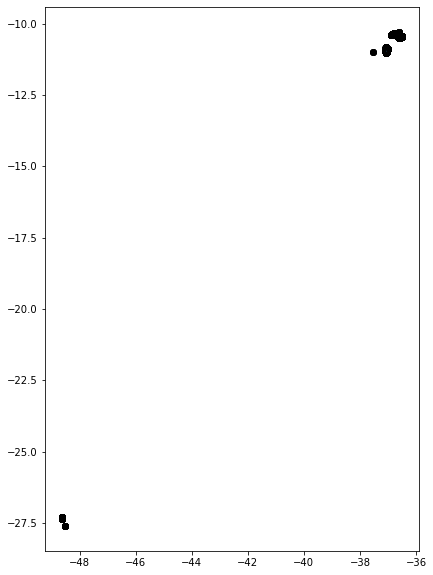

In [11]:
# Plot track_id 1 points over the Buffer Polygon
fig, ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax, color="black")
polygon.plot(ax=ax)
#plt.tight_layout()
#plt.axis(‘off’)
plt.show()

In [12]:
mask = (polygon.loc[0, "geometry"])
pip_mask_geofence = gdf.within(mask)

In [13]:
#Create PIP mask
gdf.loc[:,"geofence"] = pip_mask_geofence
gdf.sample(10)

,id,latitude,longitude,track_id,time,geometry,geofence
4032,4242,-10.379922,-36.848360,30,2014-11-04 19:31:28,POINT (-36.84836 -10.37992),False
255,256,-10.918502,-37.056872,4,2014-09-17 05:18:18,POINT (-37.05687 -10.91850),False
8729,10052,-10.897093,-37.079708,135,2015-02-14 10:34:40,POINT (-37.07971 -10.89709),False
10267,11590,-10.922700,-37.047433,147,2015-02-23 06:08:08,POINT (-37.04743 -10.92270),False
3827,4037,-10.491317,-36.619778,31,2014-11-04 18:55:11,POINT (-36.61978 -10.49132),False
8892,10215,-10.897108,-37.079730,135,2015-02-14 10:49:09,POINT (-37.07973 -10.89711),False
3314,3524,-10.498211,-36.581406,30,2014-11-04 18:51:27,POINT (-36.58141 -10.49821),False
6144,6354,-10.941413,-37.050520,42,2014-11-29 08:25:34,POINT (-37.05052 -10.94141),False
15318,16743,-10.939148,-37.081016,38013,2015-06-03 04:48:09,POINT (-37.08102 -10.93915),False
13521,14946,-10.942449,-37.056497,37992,2015-05-24 14:38:16,POINT (-37.05650 -10.94245),False


In [36]:
gdf_2 = gdf[gdf["track_id"]==4]
gdf_3 = gdf_2["time"]
gdf_3.to_csv('time',index=False)

In [14]:
# Replace True with In and False with Out
gdf["geofence"] = gdf["geofence"].replace({True: "In", False: "Out"})

In [15]:
fig_2 = px.scatter_mapbox(gdf, lat="latitude", lon="longitude", color="geofence", size="track_id" ,
size_max=6, zoom=12, width=1200, height=800)
fig_2.show(renderer="iframe")

In [40]:
fig_3 = px.scatter_mapbox(
    gdf[gdf["track_id"]== 23], 
    lat="latitude", 
    lon="longitude", 
    color="geofence", 
    size="track_id", 
    animation_frame="time", 
    size_max=100, 
    zoom=12, 
    width=1200, 
    height=800
)
fig_3.show(renderer="iframe")